# estimate numba over heads

In [77]:
from numba import njit ,types as nbt, typeof, from_dtype
from numba.experimental import jitclass
import numpy as np
from timeit import timeit, repeat
from time import perf_counter
from typing import NamedTuple

float64_1D= typeof(np.zeros((1,),dtype=np.float64))
int32_1D= typeof(np.zeros((1,),dtype=np.int32))
@njit
def F1(a, index):
    s= 0.
    for n in index:
        s += a[n]
    return s

@njit(nbt.float64(float64_1D,int32_1D ))
def F1s(a, index):
    s= 0.
    for n in index:
        s += a[n]
    return s
DT=np.dtype([('f0', '<f8'), ('f1', '<f8', (2, 3))])
S= np.zeros((1,),dtype=DT)

@njit()
def F1sDT(a, index, ss):
    s= 0.
    for n in index:
        s += a[n]
    return s

@njit()
def F1sDT(a, index, ss):
    s= 0
    a=ss['f0']
    for n in index:
        s += a[n]
    return s
@njit
def F2(a,b, index):
    s= 0.
    for n in index:
        s += a[n] + b[n]
    return s

@njit(nbt.float64(float64_1D,float64_1D, int32_1D ))
def F2s(a,b, index):
    s= 0.
    for n in index:
        s += a[n] + b[n]
    return s

@njit
def F5(a,b,c,d,e, index):
    s= 0.
    for n in index:
        s += a[n] + b[n]+ c[n]+ d[n]+ e[n]
    return s

@njit([nbt.float64(float64_1D,float64_1D,float64_1D,float64_1D,float64_1D,int32_1D )])
def F5s(a,b,c,d,e, index):
    s= 0.
    for n in index:
        s += a[n] + b[n]+ c[n]+ d[n]+ e[n]
    return s

@njit
def F10(a,b,c,d,e,f,g,h,i,j, index):
    s= 0.
    for n in index:
        s += a[n] + b[n]+ c[n]+ d[n]+ e[n] + f[n]+ g[n]+ h[n]+ i[n]+ j[n]
    return s

@njit(nbt.float64(float64_1D,float64_1D,float64_1D,float64_1D,float64_1D,
                  float64_1D,float64_1D,float64_1D,float64_1D,float64_1D,
                 int32_1D ))
def F10s(a,b,c,d,e,f,g,h,i,j, index):
    s= 0.
    for n in index:
        s += a[n] + b[n]+ c[n]+ d[n]+ e[n] + f[n]+ g[n]+ h[n]+ i[n]+ j[n]
    return s


repeats= 100
number =1
n_fields = [1,10]
n_particles = np.asarray([ 10**2,500, 10**3,10**4,10**5,10**6,10**7],dtype=np.int32)
#n_particles = n_particles[:4] # testing
N = n_particles.size

t1= np.zeros((N,repeats),dtype=np.float64)
t1s= np.zeros((N,),dtype=np.float64)
t1sDT= np.zeros((N,),dtype=np.float64)

t2= np.zeros((N,),dtype=np.float64)
t2s= np.zeros((N,),dtype=np.float64)

t5= np.zeros((N,),dtype=np.float64)
t5s= np.zeros((N,),dtype=np.float64)

t10= np.zeros((N,repeats),dtype=np.float64)
t10s= np.zeros((N,repeats),dtype=np.float64)
frac = 0.5

for n ,n_part in enumerate(n_particles):
    
    a = np.zeros((n_part,), dtype=np.float64)
    active = np.sort(np.random.choice(np.arange(n_part), size=int(n_part*frac), replace=False)).astype(np.int32)
    print('n_part', n_part,active.size)
    
    #  base case   
    F1(a,active)
    t1[n,:]=  repeat(lambda  : F1(a,active),number=number,  repeat =repeats) 

    F1s(a,active)
    t1s[n]=  timeit(lambda  : F1s(a,active),  number =repeats)  
    
    #F1sDT(a,active,S)
    #t1sDT[n]=  timeit(lambda  : F1sDT(a,active,S),  number =repeats)  
    
    F2(a,a,active)
    t2[n]=  timeit(lambda  : F2(a,a, active),  number =repeats) 

    F2s(a,a, active)
    t2s[n]=  timeit(lambda  : F2s(a, a, active),  number =repeats) 

    F5(a,a,a,a,a,active)
    t5[n]=  timeit(lambda  :  F5(a,a,a,a,a,active),  number =repeats) 

    F5s(a,a,a,a,a,active)
    t5s[n]=  timeit(lambda  :  F5s(a,a,a,a,a,active),  number =repeats)  

    F10(a,a,a,a,a,a,a,a,a,a,active)
    t10[n]=  timeit(lambda  :  F10(a,a,a,a,a,a,a,a,a,a,active),  number =repeats) 

    F10s(a,a,a,a,a,a,a,a,a,a,active)
    t10s[n,:]=  repeat(lambda  :  F10s(a,a,a,a,a,a,a,a,a,a,active),  number =number,  repeat =repeats)  
       
        
 


n_part 100 50
n_part 500 250
n_part 1000 500
n_part 10000 5000
n_part 100000 50000
n_part 1000000 500000
n_part 10000000 5000000


In [78]:
print(t10)
t10d =np.stack((np.min(t10,axis=1),np.max(t10,axis=1)),axis=1)
t10ds =np.stack((np.min(t10s,axis=1),np.max(t10s,axis=1)),axis=1)
print('10 args no sig',t10d)
print('10 args    sig',t10ds)
print('10 args  -  sig',t10d- t10ds)
print()

[[1.74800050e-04 1.74800050e-04 1.74800050e-04 1.74800050e-04
  1.74800050e-04 1.74800050e-04 1.74800050e-04 1.74800050e-04
  1.74800050e-04 1.74800050e-04 1.74800050e-04 1.74800050e-04
  1.74800050e-04 1.74800050e-04 1.74800050e-04 1.74800050e-04
  1.74800050e-04 1.74800050e-04 1.74800050e-04 1.74800050e-04
  1.74800050e-04 1.74800050e-04 1.74800050e-04 1.74800050e-04
  1.74800050e-04 1.74800050e-04 1.74800050e-04 1.74800050e-04
  1.74800050e-04 1.74800050e-04 1.74800050e-04 1.74800050e-04
  1.74800050e-04 1.74800050e-04 1.74800050e-04 1.74800050e-04
  1.74800050e-04 1.74800050e-04 1.74800050e-04 1.74800050e-04
  1.74800050e-04 1.74800050e-04 1.74800050e-04 1.74800050e-04
  1.74800050e-04 1.74800050e-04 1.74800050e-04 1.74800050e-04
  1.74800050e-04 1.74800050e-04 1.74800050e-04 1.74800050e-04
  1.74800050e-04 1.74800050e-04 1.74800050e-04 1.74800050e-04
  1.74800050e-04 1.74800050e-04 1.74800050e-04 1.74800050e-04
  1.74800050e-04 1.74800050e-04 1.74800050e-04 1.74800050e-04
  1.7480

In [79]:
t1= np.median(t1,axis=1)
t10= np.median(t10,axis=1)
t10s= np.median(t10s,axis=1)


Text(0.5, 0, 'loop count')

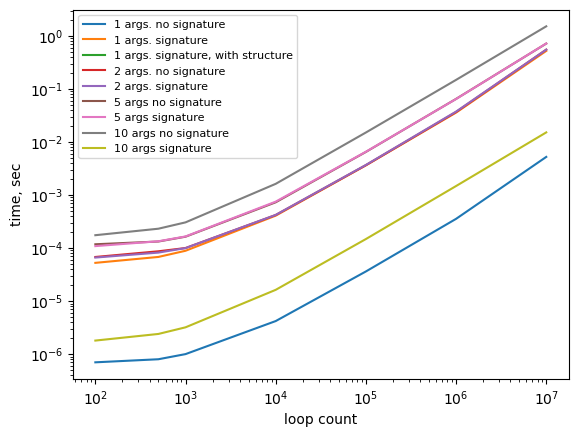

In [80]:
from matplotlib import pyplot as plt
fig,ax = plt.subplots()

ax.plot(n_particles,t1,label =f'1 args. no signature')
ax.plot(n_particles,t1s,label = f'1 args. signature')
ax.plot(n_particles,t1sDT,label = f'1 args. signature, with structure')

ax.plot(n_particles,t2,label =f'2 args. no signature')
ax.plot(n_particles,t2s,label = f'2 args. signature')

ax.plot(n_particles,t5,label =f'5 args no signature')
ax.plot(n_particles,t5s,label = f'5 args signature')

ax.plot(n_particles,t10,label =f'10 args no signature')
ax.plot(n_particles,t10s,label = f'10 args signature')

plt.xscale('log')
plt.yscale('log')
#ax.plot(ax.get_xlim(),ax.get_xlim(),c=[.8,.8,.8])
ax.legend(prop={'size': 8})
ax.set_ylabel('time, sec')
ax.set_xlabel('loop count')

# using sifvate slower 

Text(0.5, 0, 'loop count')

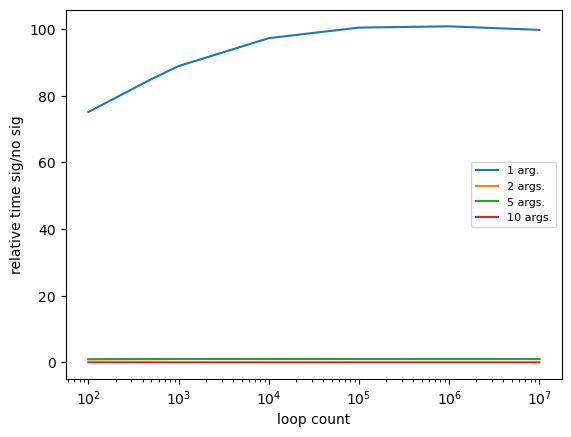

In [85]:
fig,ax = plt.subplots()
ax.plot(n_particles,t1s/t1,label =f'1 arg.')
#ax.plot(n_particles,t1sDT/t1,label =f'1 arg. with strcture')
ax.plot(n_particles,t2s/t2,label =f'2 args.')
ax.plot(n_particles,t5s/t5,label =f'5 args.')
ax.plot(n_particles,t10s/t10,label =f'10 args.')
ax.set_xscale('log')
#ax.plot(ax.get_xlim(),ax.get_xlim(),c=[.8,.8,.8])
ax.legend(prop={'size': 8})
ax.set_ylabel('relative time sig/no sig')
ax.set_xlabel('loop count')

[-5.18999877e-05 -6.71999878e-05 -8.79000290e-05 -4.04400053e-04
 -3.60010000e-03 -3.55008000e-02 -5.17232750e-01]
one arg. sig better 0
one arg. sig worse 7
[ 1.70007115e-06  4.80003655e-06  3.00002284e-07 -2.00001523e-06
 -4.29999782e-05 -6.48999994e-04  4.73799999e-04]
two args. sig better 4
two args. sig worse 3
[ 9.10006929e-06 -1.40001066e-06 -1.80007191e-06 -2.09999853e-05
 -5.15999855e-05  2.81900051e-04 -1.93530001e-03]
5 args. sig better 2
5 args. sig worse 5
[1.73000037e-04 2.29299942e-04 3.02000000e-04 1.61039998e-03
 1.49628000e-02 1.47054200e-01 1.50468880e+00]
10 args.  sig better 7
10 args.  sig worse 0


Text(0.5, 0, 'loop count')

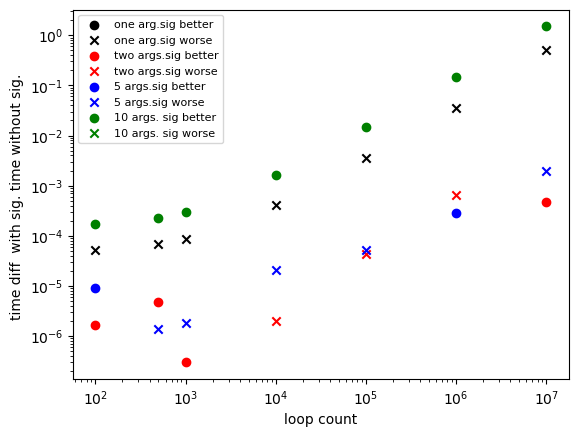

In [101]:
fig,ax = plt.subplots()
def plot_diff(t,ts,label, c):
    d= ts - t 
    print(d)
    sel = d >= 0
    print(label,'sig better',sel.sum())
    ax.scatter(n_particles[sel],d[sel],marker='o',label =label+ 'sig better',c=c)
    sel = d < 0
    print(label,'sig worse',sel.sum())
    ax.scatter(n_particles[sel],np.abs(d[sel]),marker='x',label =label+ 'sig worse',c=c)

    return np.sign(d)*np.log10(abs(d))

plot_diff(t1, t1s,f'one arg.','k')

#ax.plot(n_particles, log_signed_diff(t1, t1sDT),label =f'one arg. with structure')
plot_diff(t2,t2s,f'two args.','r')
plot_diff(t5, t5s, f'5 args.', 'b')
plot_diff(t10,t10s,f'10 args. ','g')
ax.set_xscale('log')
ax.set_yscale('log')
#ax.plot(ax.get_xlim(),ax.get_xlim(),c=[.8,.8,.8])
ax.legend(prop={'size': 8})
ax.set_ylabel('time diff  with sig. time without sig. ')
ax.set_xlabel('loop count')

[7.00005330e-07 6.79000514e-05 1.17900025e-04 1.74800050e-04]
[8.00006092e-07 8.69000214e-05 1.32900022e-04 2.31699960e-04]
[1.00000761e-06 1.00100006e-04 1.63699966e-04 3.05199996e-04]
[4.19997377e-06 4.19899996e-04 7.29800027e-04 1.62669999e-03]
[3.61999846e-05 3.64900002e-03 6.49800000e-03 1.51107000e-02]
[0.0003556 0.0368094 0.0650123 0.1485331]
[0.00523715 0.5521951  0.7191319  1.5198733 ]


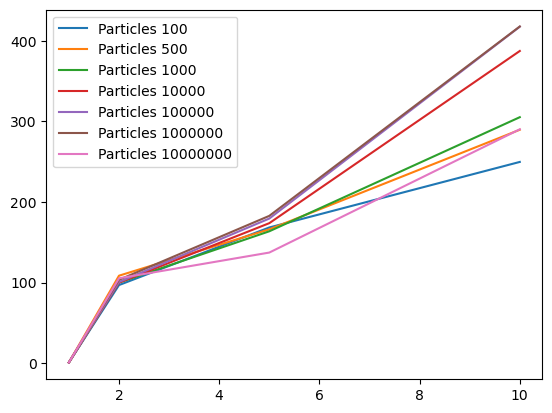

In [83]:
# look at effect of argument numbers, no signature
# stack redsults
t = np.stack((t1,t2,t5,t10),axis=1).T
#print(t.shape, t)
args= np.asarray([1, 2, 5, 10])
fig,ax = plt.subplots()

for n in range(t.shape[1]):
    print(t[:,n])
    ax.plot(args,t[:,n]/t[0,n] , label =f'Particles {n_particles[n]}')
#ax.plot(args, t,label =f'one arg.')
#ax.set_yscale('log')

ax.legend()


[0. 0. 0. 0. 0. 0. 0.]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


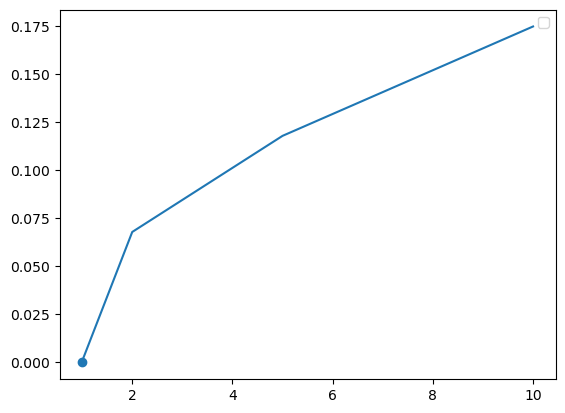

In [84]:
# look overhead at min work
print(t1sDT)
args= np.asarray([1, 2, 5, 10])
fig,ax = plt.subplots()

ax.plot(args,t[:,0]*1000 )
ax.scatter(args[0],t1sDT[0]*1000 )
#ax.plot(args, t,label =f'one arg.')
#ax.set_yscale('log')

ax.legend()